# Introduction to FFTs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## The Discrete Fourier Transform (DFT)

Let $\vec x = [x_0,x_1,...,x_{n-1}]$ be a vector with $n$ complex (or real) elements. The DFT of $\vec x$ is the complex vector $\vec y = [y_0,y_1,...,y_{n-1}]$, where the elements are defined as

$$
y_k=\sum_{j=0}^{n-1}x_j\omega^{k\cdot j},
$$

where $\omega = \exp(-2\pi i /n)$ ($i$ is the imaginary unit)

&#128309; Write a function DFT to implement this, following the comments below.

In [2]:
def DFT(x):
    """ Calculates the one dimensional discrete Fourier transform of
    a vector.
    
    :x: The vector that is being transformed.
    :returns: The Fourier transform of x.
    """
    # Get the length of the input vector and call it n
    n = len(x)
    # Create an empty numpy array y of the same length as x. This must be of type complex. 
    y = np.zeros(n, dtype=complex)
    # Compute omega following the notation above. The imaginary unit is 1j in Python! You can alwo write, e.g., 2.0j. 
    omega = np.exp(-(2*np.pi*1j) / n)
    # Step through k and calculate y[k], i.e.the DFT of x following the notation above.
    for k in range(n):
        for j in range(0, n):
            y[k] += x[j] * omega**(k*j)
    # Return the vector y
    return np.sqrt(1/n)*y

The inverse DFT is given by

$$x_k = \sum_{j=0}^{n-1} y_j\omega^{k\cdot j},$$

where $\omega = \exp(2\pi i/n)$.

&#128309; Write a function `inverseDFT` that computes the inverse 1D discrete Fourier transform. 

In [3]:
def inverseDFT(y):
    """ Calculates the inverse one dimensional discrete Fourier
    transform of a vector.
    
    :y: The vector that is being transformed.
    :returns: The inverse Fourier transform of y.
    """
    # Get the length of the input vector and call it n
    n = len(y)
    # Create an empty numpy array y of the same length as x. This must be of type complex. 
    x = np.zeros(n, dtype=complex)
    # Compute omega following the notation above. The imaginary unit is 1j in Python! You can alwo write, e.g., 2.0j. 
    omega = np.exp(2*np.pi*1j / n)
    # Step through k and calculate y[k], i.e.the DFT of x following the notation above.
    for k in range(n):
        for j in range(0, n):
            x[k] += y[j] * omega**(k*j)
    # Return the vector y
    return np.sqrt(1/n)*x

&#128309; Test your code using the following input array `x`. DFT and inverse DFT this array.

In [4]:
# Defining an array that is being transformed.
x = np.array([4, 6, 3, 0, 5, 3])
print(inverseDFT(DFT(x)))

[ 4.00000000e+00-3.92058354e-15j  6.00000000e+00-1.90363594e-15j
  3.00000000e+00-5.43895982e-16j -3.53532388e-15+1.67701261e-15j
  5.00000000e+00+3.53532388e-15j  3.00000000e+00+3.62597321e-15j]


&#128310; Comment on your results. Does your code work? 

Yes this works. We can see that there is some trunctuation error here because we have really smaller complex parts and real parts. We can confirm this works because by doing the transform and then the inverse transform we got back our original vector.

## The Fast Fourier Transform (FFT)

As you already might have noticed, this DFT-algorithm is quite inefficient. There are many subcalculations that are performed more than once, and as a consequence the complexity of this algorithm is $\mathcal O(n^2)$. 

The **Fast Fourier Transform** algorithm exploits symmetries and that many operations are similar. Below we will simply use the numpy implementation of the FFT, but we first discuss briefly how this is implemented. In particular we will briefly descibe the idea behind the radix-2 <a target="_blank" rel="noopener noreferrer" href="https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm">Cooley–Tukey algorithm</a>.

Assume that $N$ is composite. This means that $N=n_1\cdot n_2$, where $N$, $n_1$ and $n_2$ are integers. Rewrite the two indicies as 

$$
k=n_2k_1+k_2,
$$

$$
j = n_1j_2 + j_1,
$$

where $k_{1,2} = 0,1,...,n_{1,2}-1$ and $j_{1,2} = 0,1,...,n_{1,2}-1$. If we insert these new indicies into the DFT, some cross terms vanish, and the final result is

$$
y_{n_2k_1+k_2}=\sum_{j_1=0}^{n_1-1}\sum_{j_2=0}^{n_2-1}x_{n_1j_2+n_1}\exp\left[\frac{-2\pi i}{n_1n_2}(n_1j_2+j_1)(n_2k_1+k_2)\right]
$$

$$
=\sum_{j_1=0}^{n_1-1}\exp\left[-\frac{2\pi i}{n}j_1k_2\right]\left(\sum_{j_2=0}^{n_2-1}x_{n_1j_2+j_1}\exp\left[-\frac{2\pi i}{n_2}j_2k_2\right]\right)\exp\left[-\frac{2\pi i}{n_1}j_1k_1\right].
$$

In this equation each inner sum is a DFT of size $n_2$ and each outer sum is a DFT of size $n_1$. This yields a recursive formula for computing the DFT. The complexity of the FFT algorithm is $\mathcal O (n\log n)$, which makes it almost linear for large data sets!

## Solving the heat equation with the FFT

Let's revisit the heat, or diffusion, equation:

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

Where we have a solution $u(x, t)$, and if we take the Fourier transform of $u(x, t)$ along the spatial axis, we have $\mathcal{F}(u) = \hat{u}(\kappa, t)$. 

Consider the definition of a Fourier transform:

$$\mathcal{F}(f(x)) = \int_{-\infty}^{+\infty} f(x) e^{-i \kappa x} dx$$

You can derive the Fourier transform of $f'(x)$ by plugging in $f(x) = \frac{df}{dx}$ and integrating by parts. You will find that 

$$\mathcal{F}(f'(x)) = i \kappa \mathcal{F}(f(x))$$

Note: I try to use $\omega$ when taking the Fourier transform with respect to time, and $\kappa$ when with respect to space.

&#128310; Write out in your own words what the above equation means. 

The fast fourier transform of the spatial derivative of our function is the same as $i*\kappa$ times the Fourier tranform of our original function. Intuitively, this means that the spatial derivative of our function's Fourier tranform to its original function is related by a term $i \kappa$.

This is enormously useful! It means that if we have some PDE, like, say 

$$u_t = D u_{xx}$$

we can take the Fourier transform $u(x, t)$ with respect to $x$, and find

$$\hat{u}_t = -D \kappa^2 \hat{u}$$

Note that we have switched notation from writing, e.g., $\frac{\partial u}{\partial t}$ to writing $u_t$. I want you to be very comfortable with both notations. Other ways to write this same thing include $\partial_t u$ and $\dot{u}$. 

&#128310; Write out the Fourier transform of the first, second, third, fourth, and fifth spatial derivatives of $u(x, t)$ with respect to $x$. 

🔴🔴🔴🔴🔴🔴 revisit to check if correct
1st: $\hat{u}_t = -i D \kappa^3 \hat{u}$ $\newline$
2nd: $\hat{u}_t = D \kappa^4 \hat{u}$ $\newline$
3rd: $\hat{u}_t = i D \kappa^5 \hat{u}$ $\newline$
4th: $\hat{u}_t = -D \kappa^6 \hat{u}$ $\newline$
5th: $\hat{u}_t = - i D \kappa^7 \hat{u}$ $\newline$

So now we have turned our diffusion equation PDE into 

$$\hat{u}_t = -D \kappa^2 \hat{u}$$

In other words, we've turned it into an ODE. This means that to solve our PDE IVP, we might as well work with the Fourier transform of $u$, because then we can just integrate forward in time using any old ODE solver (and we've studied a few good choices). Let's try it! 

&#128309; Code up an FFT-based solver for the diffusion equation, following the code comments below. You will use the numpy functions <a target="_blank" rel="noopener noreferrer" href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html">np.fft.fftfreq</a> and <a target="_blank" rel="noopener noreferrer" href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html">np.fft.fft</a>.

In [18]:
# Set the constant D to 1
D = 1

# We will discretize our x domain with 1000 gridpoints. Set N = 1000
N = 1000

# Let the total extent of the x domain be 100, and set L = 100
L = 100

# Set dx = L/N
dx = L/N

# Build a grid of N gridpoints that goes from -L/2 to L/2 in steps of dx, and call it x
x = np.arange(-L/2, L/2, dx)

# We will need an array of kappa values for the Fourier modes. This is given by k = 2*pi*n/L for n = 0, 1, ..., N/2 - 1, and -N/2, ..., -1.
# Use np.fft.fftfreq with length N and spacing dx, and multiply the output by 2*pi.
kappa = 2*np.pi*np.fft.fftfreq(N, dx)

# Build an initial condition that is a single pulse of a square wave and call it u0 
u0 = np.zeros(N)
u0[400:600] = 1

# Take the FFT of our initial condition using np.fft.fft and call it u0hat
u0hat = np.fft.fft(u0)

# Write a function called heat that returns the righthand side of the heat equation for u_hat. Your function will need some constants. 
def heat(t, uhat):
    return -D*kappa**2*uhat

# Compute uhat using scipy's solve_ivp for the time interval [0, 10].
sol = scipy.integrate.solve_ivp(heat, [0, 10], u0hat)

# Inverse Fourier transform your solution back to real space. 
u = np.fft.ifft(sol.y)


I got here on 5/16/2024. 

I worked alone today. 

I would score my performance a 5 / 10. 

I was distracted for the majority of the notebook because of the people around me. I also didn't think critically when working through the notebook. That being said, I did do a good job of asking questions and stepping through the notebook at a reasonable pace.  

&#128309; Plot the solution once as a heatmap (with labels) and once as some sort of line plot as a function of time that illustrates what is going on.

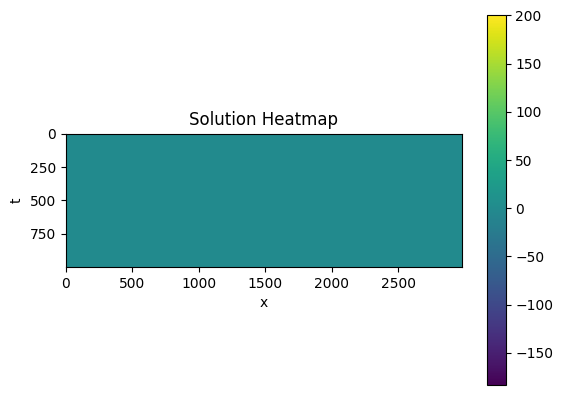

In [44]:
plt.imshow(u.real)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solution Heatmap')
plt.show()

&#128310; Explain in detail what you observe. Does it match the expected physical behavior?

## Burger's Equation (optional for now... but fun!)

See if you can use the Fourier transform method to solve and plot Burger's equation:

$$u_t + u u_x = \nu u_xx$$

start with $\nu = 0.01$ and play around with that constant. Plot your solutions nicely. Some suggested initial conditions are below.

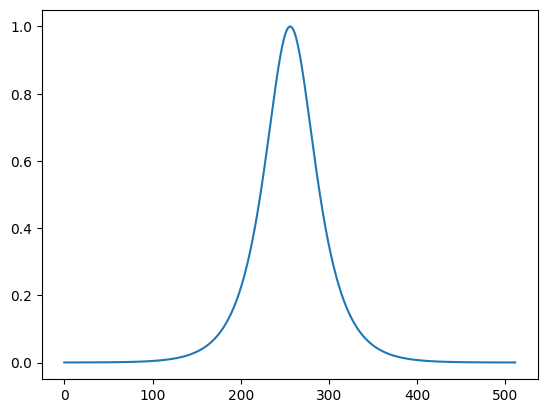

In [ ]:
# Length of domain
L = 2   

# Number of discretization points
N = 512 

dx = L/N

x = np.arange(-L/2, L/2, dx) 

# Initial condition
u0 = 1/np.cosh(x/(L/20))

plt.plot(u0)



## Acknowledgments

S.E. Clark 2024 and some parts taken from Jonas Tjemsland, Andreas Krogen, Håkon Ånes and Jon Andreas Støvneng